In [1]:
import os, cv2, argparse
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from numpy.random import RandomState
np.random.seed(123)  # for reproducibility
import sys
import random
import Image

Using TensorFlow backend.


ModuleNotFoundError: No module named 'Image'

In [32]:
def shuffle_data(arr1, arr2):
    seed = random.randint(0, 1000)
    ran = RandomState(seed)
    ran.shuffle(arr1)
    ran = RandomState(seed)
    ran.shuffle(arr2)

In [33]:
TRAIN_DIR = './training/'
TEST_DIR = './validation/'
EPOCHS = 10

In [34]:
TRAIN_IMG, TRAIN_CLS, TEST_IMG, TEST_CLS = ([] for i in range(4))
COLS = ['Label', 'Latin Name', 'Common Name', 'Train Images', 'Validation Images']
LABELS = pd.read_csv('./monkey_labels.txt', names=COLS, skiprows=1)
CLASSES = [x for x in range(0, len(LABELS))]

In [35]:
for x in range(0, 9):
    train_dir = TRAIN_DIR + 'n'+ str(x) + '/'
    test_dir = TEST_DIR + 'n'+ str(x) + '/'
    for file in os.listdir(train_dir):
        if not file.endswith('jpg'):
            print("empty file")
            continue
        img = cv2.imread(train_dir + file)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            TRAIN_IMG.append(img)
            TRAIN_CLS.append(x)
    for file in os.listdir(test_dir):
        img = cv2.imread(test_dir + file)
        if img is not None:
            img = cv2.resize(img, (100, 100))
            TEST_IMG.append(img)
            TEST_CLS.append(x)
print("COMPLETE")

COMPLETE


In [38]:
print(TRAIN_IMG)

[array([[[219, 221, 222],
        [220, 222, 223],
        [220, 222, 223],
        ...,
        [234, 238, 239],
        [234, 238, 239],
        [233, 237, 236]],

       [[217, 219, 220],
        [219, 221, 222],
        [220, 222, 223],
        ...,
        [237, 241, 242],
        [228, 232, 233],
        [235, 240, 239]],

       [[217, 219, 220],
        [217, 221, 222],
        [217, 221, 222],
        ...,
        [234, 238, 238],
        [235, 239, 240],
        [237, 241, 242]],

       ...,

       [[211, 212, 225],
        [205, 205, 217],
        [208, 208, 217],
        ...,
        [118, 128, 118],
        [115, 128, 126],
        [142, 147, 146]],

       [[222, 221, 229],
        [198, 196, 215],
        [155, 165, 185],
        ...,
        [134, 135, 123],
        [123, 131, 121],
        [145, 143, 135]],

       [[177, 184, 199],
        [140, 146, 171],
        [164, 171, 186],
        ...,
        [143, 142, 138],
        [135, 140, 131],
        [142, 140, 130]

In [41]:
img_rows, img_cols = 28, 28

img_array = np.asarray(TRAIN_IMG)
img_array2 = np.asarray(TEST_CLS)
TRAIN_IMG = img_array.astype('float32')
TEST_IMG = img_array2.astype('float32')
TRAIN_IMG /= 255
TEST_IMG /= 255

# Reshape class labels
TRAIN_CLS = np_utils.to_categorical(TRAIN_CLS, 10)
TEST_CLS = np_utils.to_categorical(TEST_CLS, 10)

# Shuffle the data
shuffle_data(TRAIN_IMG, TRAIN_CLS)
shuffle_data(TEST_IMG, TEST_CLS)
shift = 0.2


In [42]:
kernel = (3,3)
filters = 110
shape=(100,100,3)
model = Sequential()
model.add(Conv2D(filters, kernel, input_shape=shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(TRAIN_IMG, TRAIN_CLS, batch_size=32, epochs=EPOCHS, verbose=1, validation_split=0.1, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 892 samples, validate on 100 samples
Epoch 1/10
892/892 [==============================] - 17s 19ms/step - loss: 5.0895 - acc: 0.1939 - val_loss: 1.9825 - val_acc: 0.4000
Epoch 2/10
892/892 [==============================] - 16s 18ms/step - loss: 1.3301 - acc: 0.6177 - val_loss: 1.3129 - val_acc: 0.5400
Epoch 3/10
892/892 [==============================] - 17s 19ms/step - loss: 0.6291 - acc: 0.8240 - val_loss: 1.2469 - val_acc: 0.5900
Epoch 4/10
892/892 [==============================] - 17s 19ms/step - loss: 0.2942 - acc: 0.9350 - val_loss: 1.1960 - val_acc: 0.5900
Epoch 5/10
892/892 [==============================] - 16s 18ms/step - loss: 0.1283 - acc: 0.9776 - val_loss: 1.1420 - val_acc: 0.6200
Epoch 6/10
892/892 [==============================] - 17s 18ms/step - loss: 0.0609 - acc: 0.9955 - val_loss: 1.2622 - val_acc: 0.6400
Epoch 7/10
892/892 [==============================] - 16s 18ms/step - loss: 0.0313 - acc: 1.0000 - val

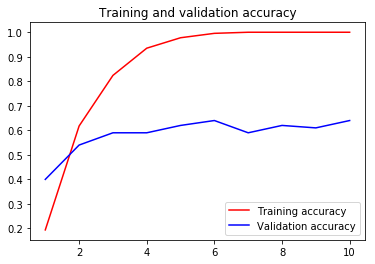

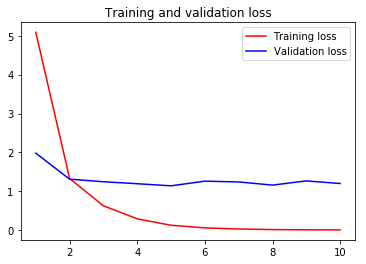

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training accuracy')
plt.plot(epochs, val_acc, 'blue', label='Validation accuracy')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [78]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Dense, Dropout, Flatten
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [84]:
def Vgg16():
    input_tensor = Input(shape=(100, 100, 3))
    vgg16 = VGG16(include_top=False, weights='imagenet',input_tensor=input_tensor)
    _model = Sequential()
    _model.add(Flatten(input_shape=vgg16.output_shape[1:]))
    _model.add(Dense(512, activation='relu'))
    _model.add(Dropout(0.5))
    _model.add(Dense(256, activation='relu'))
    _model.add(Dropout(0.5))
    _model.add(Dense(10, activation='sigmoid'))

    model = Model(inputs=vgg16.input, output=_model(vgg16.output))
    for layer in model.layers[:13]:
        layer.trainable = False

    return model

In [87]:
xtr, xval, ytr, yval = train_test_split(TRAIN_IMG, TRAIN_CLS, test_size=0.25, random_state=7)

model = Vgg16()
optimizer = Adam(lr=0.001, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0,mode='min')
ckpt = ModelCheckpoint('.model.hdf5', save_best_only=True,monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=7, verbose=1, epsilon=1e-4,mode='min')

gen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,width_shift_range=0,height_shift_range=0, channel_shift_range=0,zoom_range=0.2,rotation_range=10)
gen.fit(xtr)
model.fit_generator(gen.flow(xtr, ytr, batch_size=32),steps_per_epoch=len(xtr), epochs=1,callbacks=[earlyStopping, ckpt, reduce_lr_loss],validation_data=(xval, yval))

model.load_weights(filepath='.model.hdf5')
score = model.evaluate(xtr, ytr, verbose=1)
print('Train score:', score[0], 'Train accuracy:', score[1])


#pred_test = model.predict(TEST_IMG)
#pred_test = pred_test.reshape((pred_test.shape[0]))
#submission = pd.DataFrame({'id': df_test["id"], 'is_iceberg': pred_test})
#submission.to_csv('submission.csv', index=False)

/Users/ericgyamfi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  if sys.path[0] == '':


Epoch 1/1
744/744 [==============================] - 54s 72ms/step
Train score: 1.611809492111206 Train accuracy: 0.8999999761581421


ValueError: Error when checking input: expected input_21 to have 4 dimensions, but got array with shape (246, 1)